# HackerEarth's Deep Learning Challenge: 'Tis STILL the Season to be Jolly

* Deadline: 11th February 2021
* ### Leaderboard Rank: 118 
* Score: 91.0008 


## Team Details:
1. Swati S Mugda - 01FE18BCS237
2. Sumit Kumar Singh - 01FE18BCS231



### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from keras.applications.inception_v3 import InceptionV3,preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras import layers,models
from sklearn.model_selection import train_test_split

### Adding Data

Here, the dataset is read into a dataframe. The train and test directory paths are saved for further use.

The training data is further split into two parts as train and validation data. 

In [2]:
df = pd.read_csv('../input/holiday-season-additional-classes/dataset/new_train.csv')
TRAIN_DIR='../input/holiday-season-additional-classes/dataset/train'
TEST_DIR='../input/holiday-season-additional-classes/dataset/test'

train, val = train_test_split(df, test_size = 0.2, random_state = 42)
print(train.shape, val.shape)
df.head()

(5864, 2) (1467, 2)


,Image,Class
0,image3476.jpg,Miscellaneous
1,image5198.jpg,Candle
2,image4183.jpg,Snowman
3,image1806.jpg,Miscellaneous
4,image7831.jpg,Miscellaneous


## Visualisation of data distribution in classes

[Text(0, 0, 'Miscellaneous'),
 Text(1, 0, 'Candle'),
 Text(2, 0, 'Snowman'),
 Text(3, 0, 'Airplane'),
 Text(4, 0, 'Christmas_Tree'),
 Text(5, 0, 'Jacket'),
 Text(6, 0, 'Durga_puja'),
 Text(7, 0, 'Eid')]

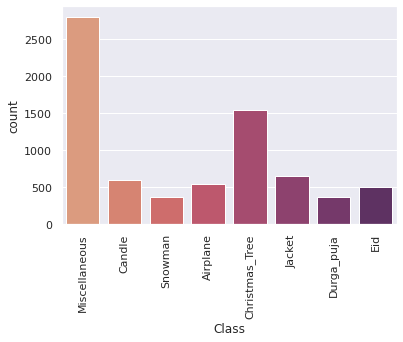

In [3]:
sns.set_theme(style="darkgrid")
g= sns.countplot(x = 'Class', data = df, palette = 'flare');
g.set_xticklabels(g.get_xticklabels(),rotation=90)

In [4]:
pie_df = df['Class'].value_counts().reset_index()
pie_df.columns = ['Class', 'count']
fig = px.pie(pie_df, values = 'count', names = 'Class', color_discrete_sequence = px.colors.qualitative.Pastel)
fig.show()

## Pro-processing

The images in train and validation dataframes are loaded in bathes from their respective directives. The images are resized to have shape (299,299,3) as they are loaded.

In [5]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

training_set = train_datagen.flow_from_dataframe(dataframe=train, directory=TRAIN_DIR,
                                                 x_col="Image", y_col="Class",
                                                 class_mode="categorical",
                                                 target_size=(299,299), batch_size=32)

validation_datagen = ImageDataGenerator(rescale = 1./255)

validation_set = validation_datagen.flow_from_dataframe(dataframe=val, directory=TRAIN_DIR,
                                                 x_col="Image", y_col="Class",
                                                 class_mode="categorical",
                                                 target_size=(299,299), batch_size=32)

/opt/conda/lib/python3.7/site-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning:

Found 30 invalid image filename(s) in x_col="Image". These filename(s) will be ignored.



Found 5834 validated image filenames belonging to 8 classes.
Found 1462 validated image filenames belonging to 8 classes.


/opt/conda/lib/python3.7/site-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning:

Found 5 invalid image filename(s) in x_col="Image". These filename(s) will be ignored.



## Importing the Inception V3 pre-trained model from Keras

In [6]:
base_model = InceptionV3(include_top=False,weights='imagenet',input_shape=(299,299,3))
base_model.trainable = False

87916544/87910968 [==============================] - 1s 0us/step


### Adding a few final layers to the model 

Some layers like GLobal Average Pooling and Dense layers are added. The final output layer will have 8 outputs for each of the 8 classes.

In [7]:
model = models.Sequential()
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(8,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 8, 8, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1049088   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 2056      
Total params: 22,985,256
Trainable params: 1,182,472
Non-trainable params: 21,802,784
____________________________________

## Training the model

The model is compiled and trained for the given training data for 12 epochs. 

In [8]:
model.compile(
    optimizer='adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'])

In [9]:
train_steps = np.ceil(training_set.n/training_set.batch_size)
history = model.fit(
    training_set,
  validation_data=validation_set,
    epochs=12,
    batch_size=32,
    steps_per_epoch=train_steps)

Epoch 1/12
183/183 [==============================] - 105s 533ms/step - loss: 1.0685 - accuracy: 0.6514 - val_loss: 0.4289 - val_accuracy: 0.8427
Epoch 2/12
183/183 [==============================] - 35s 193ms/step - loss: 0.4072 - accuracy: 0.8597 - val_loss: 0.4395 - val_accuracy: 0.8399
Epoch 3/12
183/183 [==============================] - 35s 190ms/step - loss: 0.3746 - accuracy: 0.8698 - val_loss: 0.3575 - val_accuracy: 0.8639
Epoch 4/12
183/183 [==============================] - 35s 193ms/step - loss: 0.3176 - accuracy: 0.8909 - val_loss: 0.3507 - val_accuracy: 0.8646
Epoch 5/12
183/183 [==============================] - 35s 192ms/step - loss: 0.2940 - accuracy: 0.8932 - val_loss: 0.3434 - val_accuracy: 0.8714
Epoch 6/12
183/183 [==============================] - 34s 184ms/step - loss: 0.2750 - accuracy: 0.9014 - val_loss: 0.3570 - val_accuracy: 0.8776
Epoch 7/12
183/183 [==============================] - 35s 191ms/step - loss: 0.2417 - accuracy: 0.9148 - val_loss: 0.4303 - val_a

### Performance Evaluation using Learning Curves

The model slightly overfits, but eventually shows proper fit with both validation accuracy very close to training accuracy

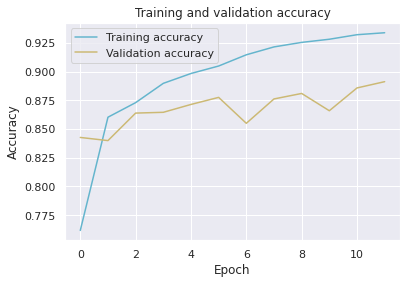

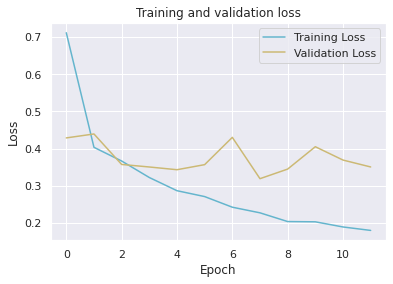

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss'] 

epochs = range(len(acc))

plt.plot(epochs, acc, 'c-', label='Training accuracy')
plt.plot(epochs, val_acc, 'y-', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'c-', label='Training Loss')
plt.plot(epochs, val_loss, 'y-', label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [11]:
test_df = pd.DataFrame()
test_images = os.listdir(TEST_DIR)
test_df['Image']=test_images
test_df.head()

,Image
0,image7761.jpg
1,image3202.jpg
2,image688.jpg
3,image233.jpg
4,image4332.jpg


## Testing the model 

The model is then tested for the test data given. The output is saved in pred.csv file. 

In [12]:
test_generator = train_datagen.flow_from_dataframe(
    test_df,
    directory=TEST_DIR,
    x_col = 'Image',
    y_col = None,
    target_size=(299,299),
    class_mode = None,
    batch_size=32,
    shuffle = False)

Found 3489 validated image filenames.


In [13]:
test_steps = np.ceil(test_generator.n/test_generator.batch_size)
pred = model.predict(
    test_generator,
    steps = test_steps,
    verbose = 1)

pred = np.argmax(pred,axis=-1)

110/110 [==============================] - 35s 307ms/step


In [14]:
test_df['Class']=pred
num_to_class = dict((y,x) for (x,y) in training_set.class_indices.items())
test_df['Class']=test_df['Class'].map(num_to_class)
test_df.to_csv('pred.csv',index=False)